<center>
<img src="./pict/panda_logo_ts.png">
<br />
<br />

In [2]:
import datetime #стандартный модуль питона для работы с временем

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
# Date Time Index и timestamp - осн объекты
dti = pd.to_datetime(['01.01.2020', 'Jan 1, 2020', 
                      np.datetime64('2020-01-01'), 
                      datetime.datetime(2020, 1, 31), None])
dti
#создать сразу несколько календарных объектов из разних типов, ! всё приводится к однйо нотации
#возвращает временной индекс, можно им индексировать датафрейм

DatetimeIndex(['2020-01-01', '2020-01-01', '2020-01-01', '2020-01-31', 'NaT'], dtype='datetime64[ns]', freq=None)

In [18]:
dti[1]#индексирование  в действии
dti[-1]#пустота, аналог временного ничто (nan in numpy)
dti[-1] == dti[-1]#не равны между собой

NaT

In [20]:
pd.to_datetime(['01-03-2020 10:00'], dayfirst=True) #преобразовать питоновскую строку в временной объект
#это объект типа timestamp - точка во времени

DatetimeIndex(['2020-03-01 10:00:00'], dtype='datetime64[ns]', freq=None)

In [11]:
pd.to_datetime(['20-01-2020', '01-03-2020'], dayfirst=True) # не строго
#dayfirst -- уточняем, что сначала указывается день, а не месяц, как в английской вариации
#но это таргумент нестрогий, если укажем 20 месяц - он поймёт, что его не может быть

DatetimeIndex(['2020-01-20', '2020-03-01'], dtype='datetime64[ns]', freq=None)

In [5]:
pd.to_datetime('03-01-2020 05:30', format='%d-%m-%Y %H:%M') # явный формат даты

#дни месяцы год часы минуты (можно микросекунды, декады, и т.д.)

Timestamp('2020-01-03 05:30:00')

In [6]:
pd.to_datetime(['2009/07/31', 'test']) # ошибка
#не всякая строка может конвертироваться в дату

ValueError: ('Unknown string format:', 'test')

In [22]:
not_dti = pd.to_datetime(['2009/07/31', 'test'], errors='ignore') # пути обхода
#явно скажем, что строки, которые не парсятся в дату, оставляем как есть
not_dti[1] #строка test так и осталась

'test'

In [23]:
not_dti1 = pd.to_datetime(['2009/07/31', 'test'], errors='coerce')#преобразуем непонятные строки в NaT
not_dti1[1]

NaT

In [102]:
# можно еще и так

df = pd.DataFrame({'year': [2020, 2020],
                   'month': [1, 3],
                   'day': [3, 5],
                   'hour': [2, 3]})#конструируем датафрейм в таймстемп как массив
df
#pd.to_datetime(df)

,year,month,day,hour
0,2020,1,3,2
1,2020,3,5,3


In [28]:
dti[0] # TimeStamp - базовый объект времени в Pandas

Timestamp('2020-01-01 00:00:00')

In [29]:
pd.Timestamp(datetime.datetime(2020, 1, 1)) # явное приведение типов
#|см вниз след ячейку

Timestamp('2020-01-01 00:00:00')

In [30]:
datetime.datetime(2020, 1, 1)
#питоновское время 20 год 1 день 1 месяц 0 часов 0 минут
pd.DataFrame([2,3,4])#можем любой список привести к пандасовскому датафрейму
#так же можем привести любое другое время к пандас таймстемп

datetime.datetime(2020, 1, 1, 0, 0)

In [32]:
#pd.Timestamp(datetime.datetime(2020, 1, 1)) это ещё и календарь, с выходными и високосными годами и т.д.
pd.Timestamp.min, pd.Timestamp.max # ограничения на начало и конец эпохи

(Timestamp('1677-09-21 00:12:43.145225'),
 Timestamp('2262-04-11 23:47:16.854775807'))

In [34]:
pd.NaT # аналог np.nan, None и т.д.
#проверка через оператор is
pd.NaT is pd.NaT

True

In [35]:
pd.date_range(start='2020-01-01', end='2020-01-02', freq='H')
#генерация date time индекса -- начало даты, конец даты, с какой частотой
#крайние даты включены, в отличие от range (посл не включается) тип timestamp
#если хотим убрать последние 00 частов -- доб. [:-1]

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               '2020-01-01 10:00:00', '2020-01-01 11:00:00',
               '2020-01-01 12:00:00', '2020-01-01 13:00:00',
               '2020-01-01 14:00:00', '2020-01-01 15:00:00',
               '2020-01-01 16:00:00', '2020-01-01 17:00:00',
               '2020-01-01 18:00:00', '2020-01-01 19:00:00',
               '2020-01-01 20:00:00', '2020-01-01 21:00:00',
               '2020-01-01 22:00:00', '2020-01-01 23:00:00',
               '2020-01-02 00:00:00'],
              dtype='datetime64[ns]', freq='H')

In [36]:
pd.date_range('2020-01-01', '2020-01-05', periods=10)#здесь задаём количество интервалов, а не частоту

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 10:40:00',
               '2020-01-01 21:20:00', '2020-01-02 08:00:00',
               '2020-01-02 18:40:00', '2020-01-03 05:20:00',
               '2020-01-03 16:00:00', '2020-01-04 02:40:00',
               '2020-01-04 13:20:00', '2020-01-05 00:00:00'],
              dtype='datetime64[ns]', freq=None)

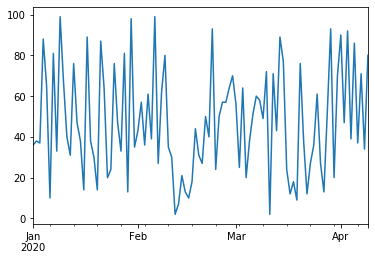

In [40]:
ts = pd.Series(np.random.randint(0, 100, size=100), 
          index=pd.date_range('2020-01-01', periods=100, freq='D'))#.head()
#генерация временного ряда, генерим случ чиал и в кач индекса берем timestamp
ts.plot()

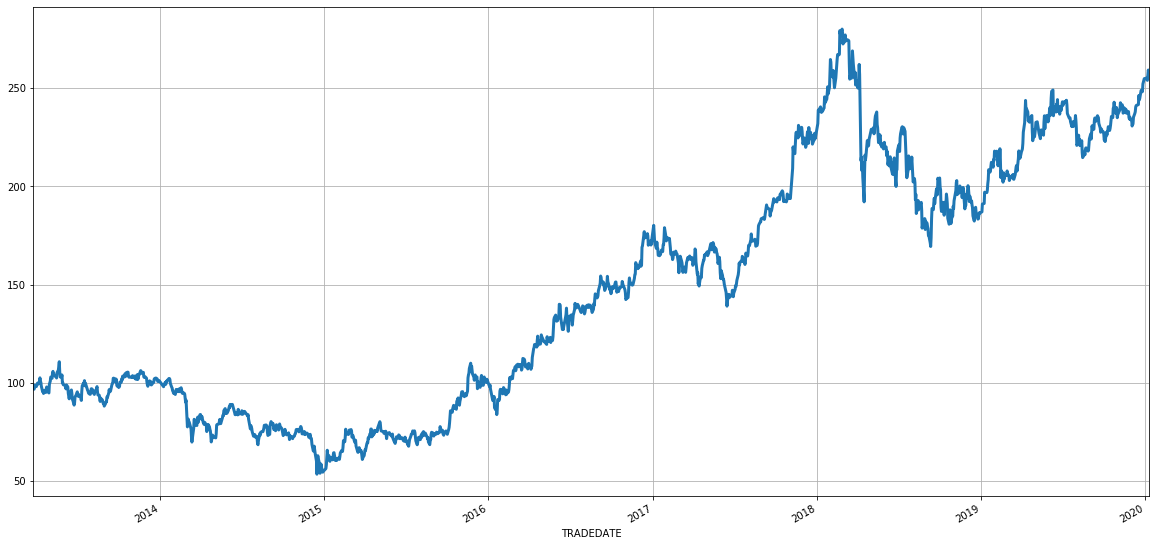

In [99]:
ts =  pd.read_csv('./sber_stocks.csv', usecols=['CLOSE', 'TRADEDATE'], 
                 index_col='TRADEDATE', parse_dates=True)
#скачали -- берем только 2 стоблца -- дата будет индексом -- и его преобр к timestamp
#parse_date == столбец TRADEDATE преобразовать pd.to_datetime()
ts = ts.CLOSE

ts.plot(figsize=(20, 10), grid=True, linewidth=3)

In [43]:
ts['2020-01-01':'2020-01-15'] # можно делать slice, крайние точки включены
#вывести все элементы, которые во времени находятся от до,rhfqybt njxrb ,thencz
# == ts.iloc[0:100] -- вывести 100 строк из ts

TRADEDATE
2020-01-03    255.00
2020-01-06    253.90
2020-01-08    259.15
2020-01-09    257.99
2020-01-10    258.19
Name: CLOSE, dtype: float64

распарсить - приветсти все данные ко входному типу
напрмер, стринг --> таймсериес

In [44]:
ts.index.resolution #day? minutes ...

'day'

In [45]:
ts['2020-01'] # и так, потому что 2020-01 больше чем resolution индекса
#т.е. вывести все строки, которые были в январе

TRADEDATE
2020-01-03    255.00
2020-01-06    253.90
2020-01-08    259.15
2020-01-09    257.99
2020-01-10    258.19
Name: CLOSE, dtype: float64

In [46]:
ts['2019-01':'2020-01-03'] # и так 
#весь месяц январь 19 и по конкретную дату -- 03.01.2020
#можно ['2017':'2020-01-03']

TRADEDATE
2019-01-03    186.99
2019-01-04    190.99
2019-01-08    191.24
2019-01-09    197.00
2019-01-10    196.75
               ...  
2019-12-25    248.04
2019-12-26    248.24
2019-12-27    252.06
2019-12-30    254.75
2020-01-03    255.00
Name: CLOSE, Length: 253, dtype: float64

In [49]:
ts.index[2].day_name() # есть встроенный календарь 
#узнать день недели

'Wednesday'

In [51]:
friday = (ts.index[2] + pd.Timedelta('2D')) # time delta
friday.day_name()
#прибавляем календарные два дня

'Friday'

In [53]:
monday = friday + pd.offsets.BusinessDay() # offset умнее time delta
monday.day_name()
#прибавляем 1 рабочий день, полчим из пт пн

'Monday'

In [59]:
stamp = pd.Timestamp('2020-01-04 00:00:00')#строку к таймстемп
offset = pd.offsets.BusinessHour(start='09:00', end='18:00')#создаём offset, где указываем каков раюочий день
forw = offset.rollforward(stamp) #откатиться к ближайшему рабочему дню и рабочему часу вперёд
#rollback -- откатиться ---"--- назад
print(stamp.day_name())
print(forw.day_name())

Saturday
Monday


In [60]:
stamp + offset # перейдет на понедельник и прибавит бизнес час

Timestamp('2020-01-06 10:00:00')

In [61]:
(stamp + offset).normalize() # нормализация даты -- уст 00 часов, 00 минут

Timestamp('2020-01-06 00:00:00')

In [63]:
stamp + pd.offsets.Week(weekday=4) # offset с параметризацией
#здесь - прибавить неделю так, чтобы оказаться в 4+1 дне неделе

print((stamp + pd.offsets.Week(weekday=4)).weekday())
(stamp + pd.offsets.Week(weekday=4)).day_name()

4


'Friday'

In [ ]:
(stamp + pd.offsets.Week(weekday=4)).weekday() 

In [ ]:
(stamp + pd.offsets.Week(weekday=4)).day_name()

In [64]:
dti + pd.offsets.LastWeekOfMonth() # можно оперирировать сразу со всем date time index'ом
#к каждому дню прибавить так, чтобы оказаться в последней неделе месяца

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:837: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  PerformanceWarning,


DatetimeIndex(['2020-01-27', '2020-01-27', '2020-01-27', '2020-01-27', 'NaT'], dtype='datetime64[ns]', freq=None)

In [65]:
# кастомизация рабочего дня

weekmask_egypt = 'Sun Mon Tue Wed Thu' #маска рабочей недели
holidays = ['2012-05-01',
            datetime.datetime(2013, 5, 1),
            np.datetime64('2014-05-01')] # указываем выходные, формат неважен

bday_egypt = pd.offsets.CustomBusinessDay(holidays=holidays,
                                          weekmask=weekmask_egypt)#создаём offset с указанием праздников и раб дней

dt = datetime.datetime(2013, 4, 30)

dt + 2 * bday_egypt #что-нибудь прибавить

Timestamp('2013-05-05 00:00:00')

In [66]:
pd.Timestamp(dt).day_name()

'Tuesday'

In [67]:
(dt + 2 * bday_egypt).day_name()

'Sunday'

In [ ]:
# генерация кастомного индекса рабочих дней

weekmask = 'Mon Wed Fri'
holidays = [datetime.datetime(2011, 1, 5), datetime.datetime(2011, 3, 14)]
bdti = pd.bdate_range('2020-01-01', '2020-01-20', freq='C', weekmask=weekmask, holidays=holidays)
#создать даты от -- до -- с custom freq ?, только рабочими днями и учётом праздниковbdti

In [68]:
# кастомизация рабочего часа

cbh = pd.offsets.CustomBusinessHour(start='10:00', weekmask='Tue Wed Thu Fri')
#генерируем рабочие часы и дни недели
print((dti[0] + pd.Timedelta(days=-2)).day_name())#вычитаем 2 дня
dti[0] + pd.Timedelta(days=-2) + cbh #оказываемся в рабочей неделе (вт)

Monday


Timestamp('2019-12-31 11:00:00')

In [69]:
dti[0].day_name()

'Wednesday'

In [70]:
(dti[0] + pd.Timedelta(days=-2) + cbh).day_name()

'Tuesday'

In [83]:
# кастомизация календаря -- создать свой календарь

#импортируем объекты nearest и другие из подраздела библиотеки
from pandas.tseries.holiday import AbstractHolidayCalendar, Holiday, nearest_workday

#создадим класс Российского календаря
class RussianBusinessCalendar(AbstractHolidayCalendar):
    start_date = datetime.datetime(1999, 1, 1)#начальная дата
    end_date = datetime.datetime(2019, 12, 31)#конечная дата
    #создаём 1 праздник: название, мес, день, если выпадет на вых -- перенос на ближайший раб день
    rules = [Holiday('March 8th', month=3, day=8, observance=nearest_workday)]
    
russian_busday = pd.offsets.CustomBusinessDay(weekmask='Mon Tue Wed Thu Fri',  #указываем раб дни, ост автоматически выходные
                                              calendar=RussianBusinessCalendar())
#кастомный рабочий российский день

прописать в праздниках данные с открытого портала
дз на подобное

In [84]:
pd.to_datetime('2020-03-06').day_name()

'Friday'

In [85]:
pd.to_datetime('2020-03-06') + russian_busday #прибавили 1 рабочий российский день, 9 марта стало нерабочим

Timestamp('2020-03-10 00:00:00')

In [86]:
(pd.to_datetime('2020-03-06') + russian_busday).day_name() # потому что 8 марта выпало на понедельник

'Tuesday'

In [87]:
# преобразование частоты
#биржа не раб по вых, данных нет. Преобразуем так, чтобы выходные дни были (заполн NaN)
#индекса приведется к указанно частоте
ts.asfreq(pd.offsets.Day()) #.fillna(method='pad') -- заполнить пропуски заданным значением

TRADEDATE
2013-03-25     98.79
2013-03-26     97.20
2013-03-27     96.75
2013-03-28     98.59
2013-03-29     98.76
               ...  
2020-01-06    253.90
2020-01-07       NaN
2020-01-08    259.15
2020-01-09    257.99
2020-01-10    258.19
Freq: D, Name: CLOSE, Length: 2483, dtype: float64

In [89]:
ts.resample('1W').mean()#сагригируем всё к 1 неделе и внутри неё взять среднее
#сагригировалось к вс. Аналог group by

TRADEDATE
2013-03-31     98.0180
2013-04-07     99.1760
2013-04-14    100.4340
2013-04-21     95.5100
2013-04-28     96.2320
                ...   
2019-12-15    239.5060
2019-12-22    243.5920
2019-12-29    249.1620
2020-01-05    254.8750
2020-01-12    257.3075
Freq: W-SUN, Name: CLOSE, Length: 355, dtype: float64

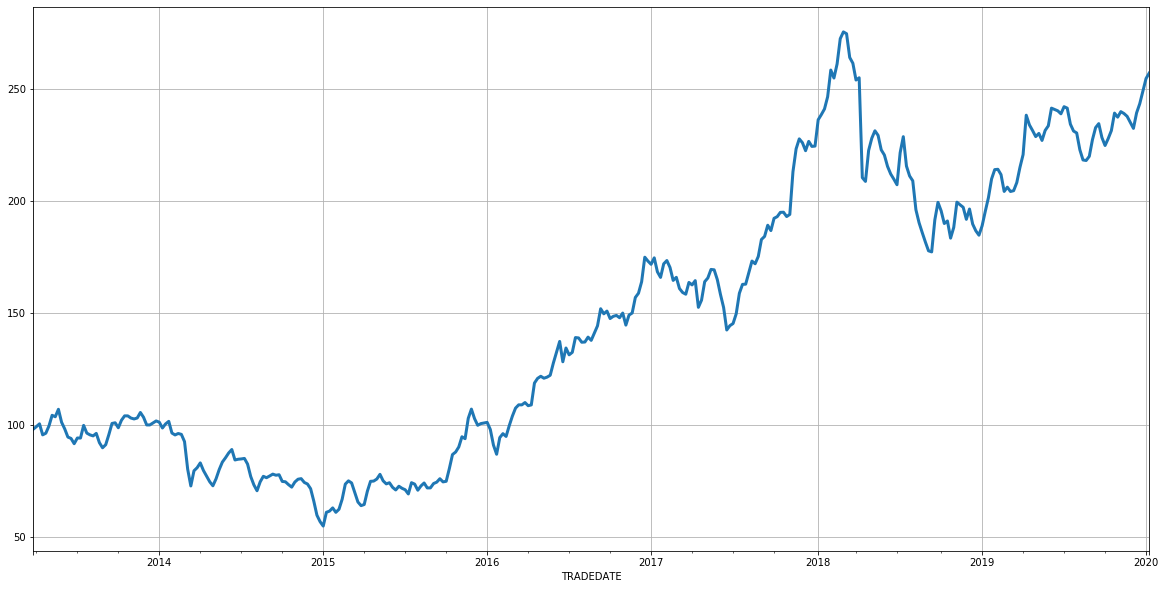

In [88]:
ts.resample('1W').mean().plot(figsize=(20, 10), linewidth=3, grid=True) # ресамплинг от дней к неделям
#график: более гладкий т.к. цена деления - неделя

In [90]:
ts.resample('1W').agg([np.sum, np.mean, np.std]).head() # агрегации по временному индексу
#несколько врмемнных рядов, где суммируем, берем среднее и лисперсию

,sum,mean,std
TRADEDATE,,,
2013-03-31,490.09,98.018,0.968334
2013-04-07,495.88,99.176,0.713358
2013-04-14,502.17,100.434,1.484025
2013-04-21,477.55,95.510,0.625220
2013-04-28,481.16,96.232,1.060269


создать календарь и на его основе признаки

In [91]:
ts.shift(5).head(20) # лаги (это сдвиги)
#сдвиг гременного ряда (на 5, первые 5 заполняются NaN)

TRADEDATE
2013-03-25       NaN
2013-03-26       NaN
2013-03-27       NaN
2013-03-28       NaN
2013-03-29       NaN
2013-04-01     98.79
2013-04-02     97.20
2013-04-03     96.75
2013-04-04     98.59
2013-04-05     98.76
2013-04-08     98.07
2013-04-09     98.93
2013-04-10     99.59
2013-04-11     99.91
2013-04-12     99.38
2013-04-15    100.43
2013-04-16    102.53
2013-04-17    100.56
2013-04-18    100.31
2013-04-19     98.34
Name: CLOSE, dtype: float64

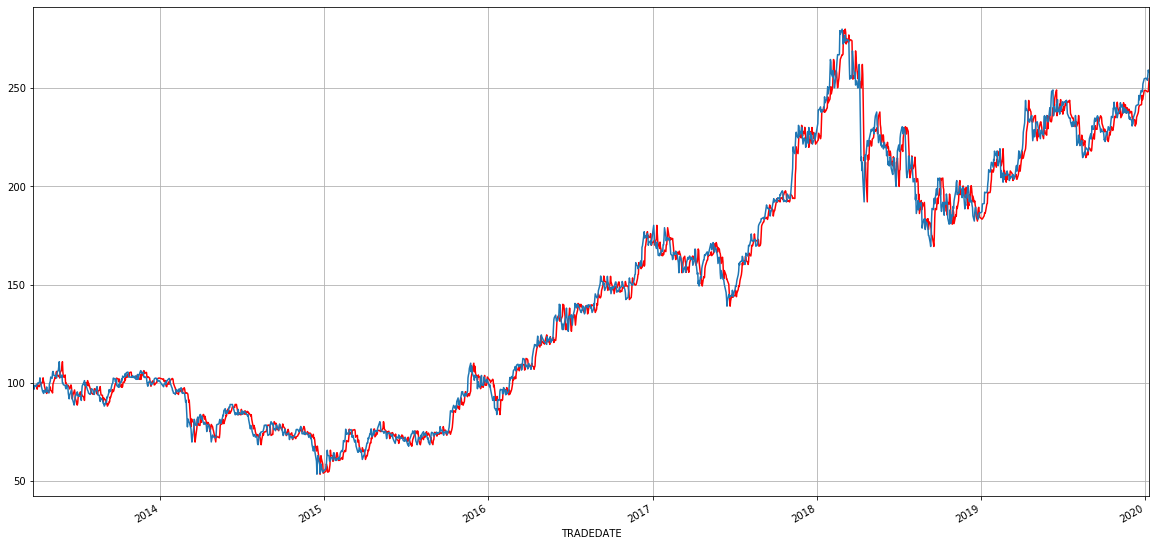

In [92]:
#сдвинем на 5 и сравним с  текущим
ts.shift(5).plot(figsize=(20, 10), color='red')
ts.plot(grid=True)

In [94]:
ts.asfreq('1D').fillna(-1).shift(5, freq=pd.offsets.BDay()) # 5 лаг по рабочим дням, с выравниванием по дате
#сдвигаем на 6 рабочих дней назад, прописываем в частоте -- BusinessFay
#А также выходные дни заполняем -1

TRADEDATE
2013-04-01     98.79
2013-04-02     97.20
2013-04-03     96.75
2013-04-04     98.59
2013-04-05     98.76
               ...  
2020-01-13    253.90
2020-01-14     -1.00
2020-01-15    259.15
2020-01-16    257.99
2020-01-17    258.19
Name: CLOSE, Length: 2483, dtype: float64

In [50]:
ts.rolling(window=5).mean() # скользящие статистики
#бежать по временному ряду с каким-то окном и считать среднее: объед 5 дней и для него среднее

TRADEDATE
2013-03-25        NaN
2013-03-26        NaN
2013-03-27        NaN
2013-03-28        NaN
2013-03-29     98.018
2013-04-01     97.874
2013-04-02     98.220
2013-04-03     98.788
2013-04-04     99.052
2013-04-05     99.176
2013-04-08     99.648
2013-04-09    100.368
2013-04-10    100.562
2013-04-11    100.642
2013-04-12    100.434
2013-04-15     99.444
2013-04-16     98.122
2013-04-17     96.926
2013-04-18     95.934
2013-04-19     95.510
2013-04-22     95.434
2013-04-23     95.542
2013-04-24     96.204
2013-04-25     96.356
2013-04-26     96.232
2013-04-29     96.178
2013-04-30     96.746
2013-05-02     97.336
2013-05-03     98.698
2013-05-06    100.034
               ...   
2019-11-26    237.208
2019-11-27    236.496
2019-11-28    236.106
2019-11-29    235.276
2019-12-02    234.434
2019-12-03    233.566
2019-12-04    233.040
2019-12-05    232.342
2019-12-06    232.574
2019-12-09    233.228
2019-12-10    234.678
2019-12-11    236.424
2019-12-12    238.292
2019-12-13    239.506


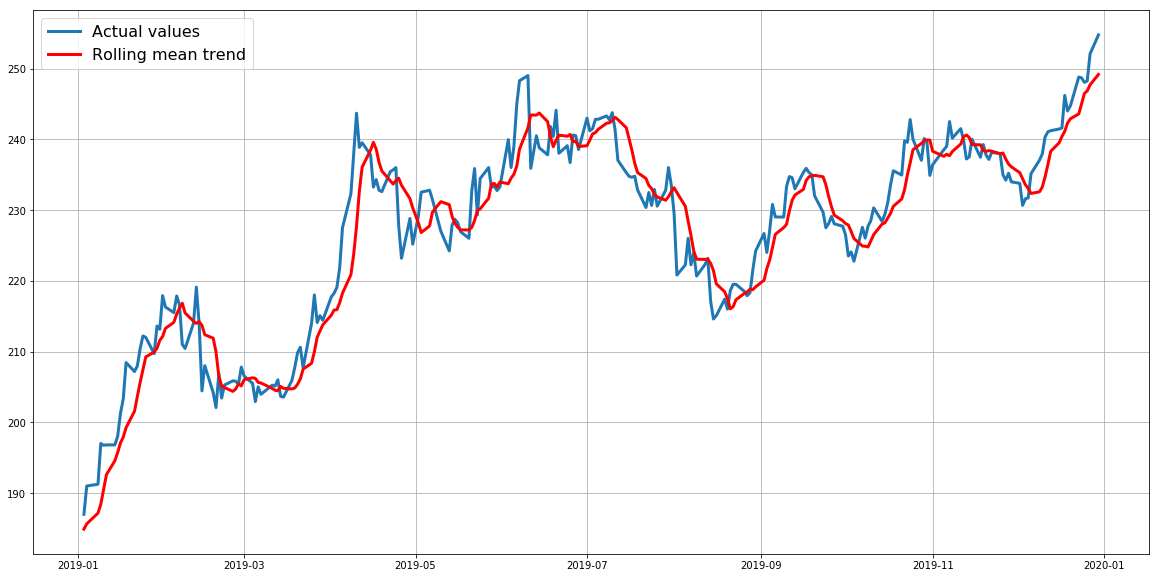

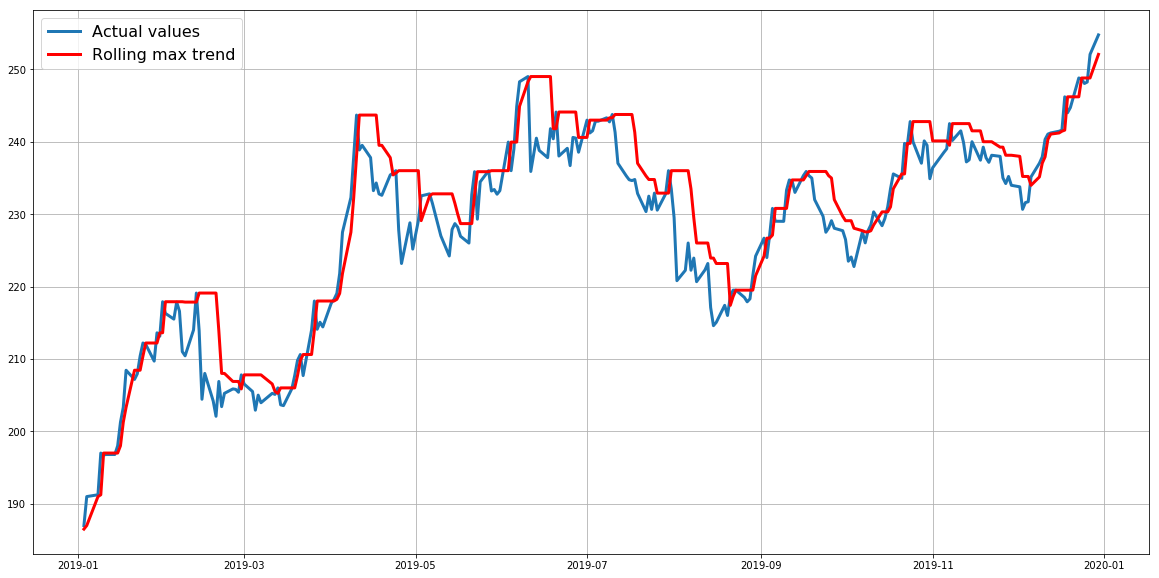

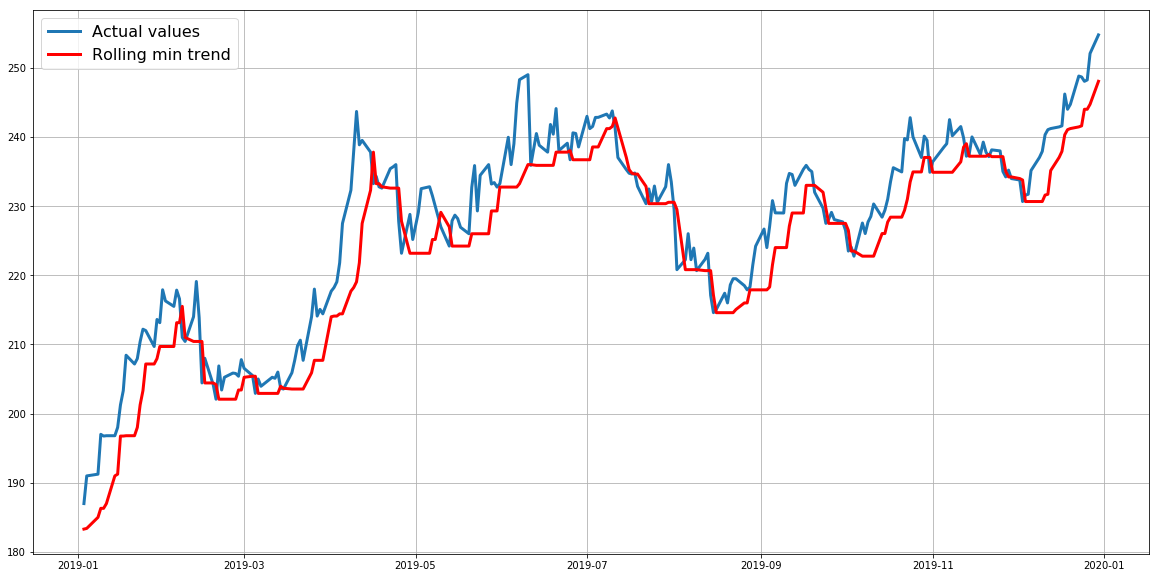

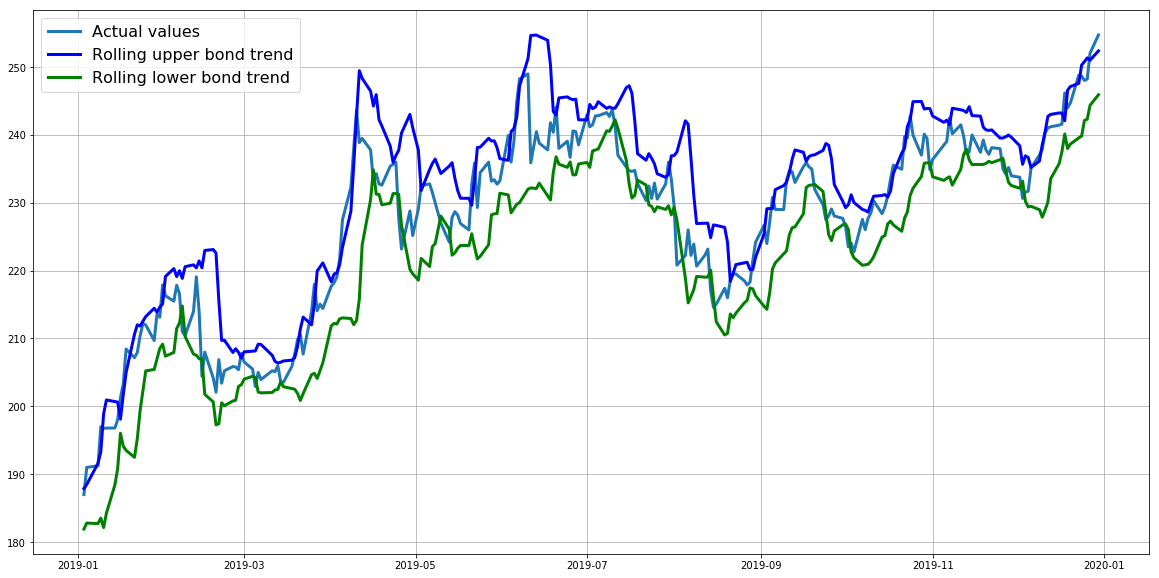

In [51]:
rolling_mean = ts.rolling(window=5).mean().shift(1) 
rolling_max = ts.rolling(window=5).max().shift(1)
rolling_min = ts.rolling(window=5).min().shift(1)
rolling_std = ts.rolling(window=5).std().shift(1)
upper_bond = rolling_mean + 1.96 * rolling_std
lower_bond = rolling_mean - 1.96 * rolling_std

plt.figure(figsize=(20, 10))
plt.plot(ts['2019'], linewidth=3, label="Actual values")
plt.plot(rolling_mean['2019'], "r", linewidth=3, label="Rolling mean trend")
plt.legend(prop={'size':16})
plt.grid(True)
plt.show()

plt.figure(figsize=(20, 10))
plt.plot(ts['2019'], linewidth=3, label="Actual values")
plt.plot(rolling_max['2019'], "r", linewidth=3, label="Rolling max trend")
plt.legend(prop={'size':16})
plt.grid(True)
plt.show()

plt.figure(figsize=(20, 10))
plt.plot(ts['2019'], linewidth=3, label="Actual values")
plt.plot(rolling_min['2019'], "r", linewidth=3, label="Rolling min trend")
plt.legend(prop={'size':16})
plt.grid(True)
plt.show()

plt.figure(figsize=(20, 10))
plt.plot(ts['2019'], linewidth=3, label="Actual values")
plt.plot(upper_bond['2019'], "b", linewidth=3, label="Rolling upper bond trend")
plt.plot(lower_bond['2019'], "g", linewidth=3, label="Rolling lower bond trend")
plt.legend(prop={'size':16})
plt.grid(True)
plt.show()
#скользящая за 5 дней, максимум за 5 дней, минимум за 5 дней, другие интервалы

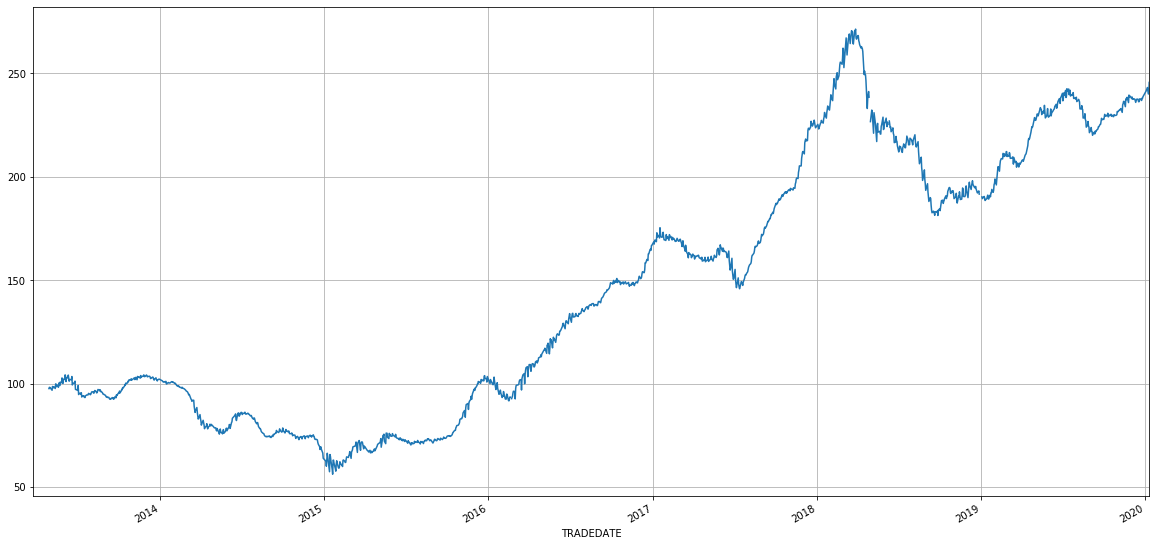

In [95]:
# с группировкой по дням недели
#сгруппировать скользящее среднее по признакам -- например по  дням недели

ts = pd.DataFrame(ts)
ts['weekday'] = ts.index.weekday #создаем признак -- день недели
ts.groupby('weekday')['CLOSE'].transform(lambda x: x.rolling(window=5).mean().shift(1)).plot(figsize=(20, 10), grid=True)
#группируем по нему и делаем rolling, с shift(1), чтобы не брать текущее значение ряда
#PS: предварительно идут наны, т.к. ещё не накопилась статтистика по 5 рабочим дням для этого дня недели, поэтому пока NaN. Потом статистика накапливается и получается временной ряд, 
#в кот стоит скользящее среднее за 5 последние такие же 5 дней недели

In [ ]:
ts['2019'].CLOSE.expanding().sum().plot(figsize=(20, 10), grid=True, linewidth=3) # расширяющееся окно
#expanding -- там скользит, здесь расширяется (sum - коммолютивно прибавляет каждое значение к предыдущему)
#если mean() -- коммолютивное среднее

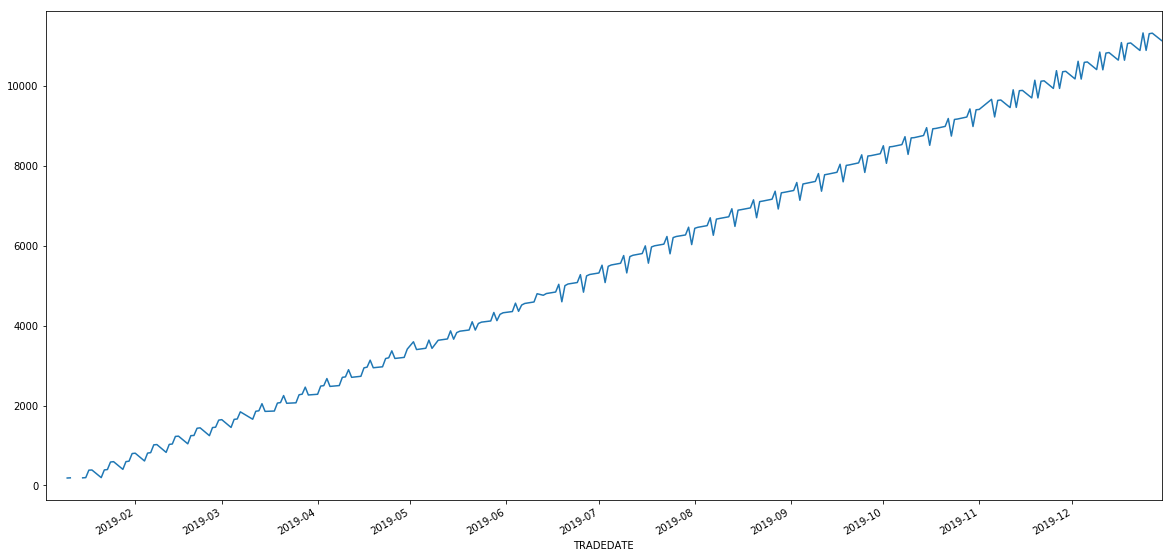

In [67]:
# можно и с группировкой расш окна (как делали скользящее сгруппированные по дням недели)
ts['2019'].groupby('weekday')['CLOSE'].transform(lambda x: x.expanding().sum().shift(1)).plot(figsize=(20, 10))